### 5.2. Decison Tree

In [46]:
import os
os.chdir('/Users/apple/Downloads/Project/Code')
current_path = os.getcwd()
data_path = os.path.dirname(os.getcwd()) + '/Data/'

from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
%matplotlib inline

#### 5.2.1. Feature Preprocessing and choose of  hyperparameters
* We train on **70%** of the sample and test on **30%** of the sample
* **SMOTE** transformation is used to tackle the 'imbalance dataset' problem
* To increase training speed, the data are **standardized**
* We use **PCA** to reduce dimension
* To determine the **parameter max_depth** in decision tree, we use the **grid search**.

In [15]:
stock_data = pd.read_csv(data_path + 'traindf.csv')
X_raw=stock_data.iloc[:,1:75].values
y_raw=stock_data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.3, random_state=1)
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)

* Pipeline

In [27]:
steps = [('sts', StandardScaler()),
                        ('pca', PCA(n_components=0.6)),
                        ('tree', DecisionTreeClassifier(criterion= 'entropy', max_depth=3, random_state=0))]
pipe_DecisionTreeClassifier = Pipeline(steps)

* Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'tree__max_depth': [5, 10, 15, 20]}]

gs = GridSearchCV(estimator=pipe_DecisionTreeClassifier,
                  param_grid=param_grid, 
                  scoring='precision', 
                  cv=10)
gs = gs.fit(X_train, y_train)


#### 5.2.3. Result
* The precision is 0.30, which is based on default threshold 50%

In [44]:
y_pred = gs.predict(X_test)
precision_score(y_test, y_pred)

0.30457642577391492

* Even if we increase the threshold, the result is still not good

Text(0.5,1,'The relationship between change of thresholds and precision')

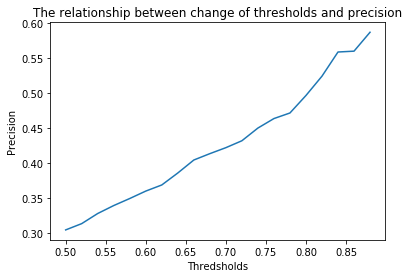

In [45]:
y_pred = gs.predict(X_test)
y_probas = gs.predict_proba(X_test)
c = [i for i in y_test]
testdf = pd.DataFrame({'pred': y_pred, 'prob': y_probas[:,1], 'test': c})
testdf = testdf.sort_values(['pred'], ascending = False)
recalllist = []
thredlist = list(range(50, 90, 2))
for i in thredlist:
	tempdf = testdf[testdf['prob'] >= i / 100]
	recalllist.append(sum(tempdf['test'] == 1) / len(tempdf))
thredlist = list(map(lambda x : x / 100, thredlist))
plt.plot(thredlist, recalllist)
plt.xlabel('Thredsholds')
plt.ylabel('Precision')
plt.title('The relationship between change of thresholds and precision')

* The ROC shows that the performance is not as good as that of logistic regression

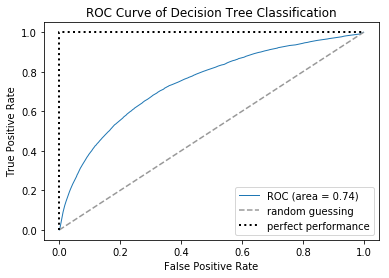

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_probas[:,1], pos_label = 1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr,lw =1, label = 'ROC (area = %.2f)' %(roc_auc))
plt.plot([0,1], [0,1], linestyle = '--', color = (0.6, 0.6, 0.6), label = 'random guessing')
plt.plot([0,0,1], [0,1,1], lw=2, linestyle = ':', color = 'black', label = 'perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree Classification')
plt.legend(loc = 'lower right')